# Impor Beberapa Package

In [76]:
from netCDF4 import Dataset
import wrf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

# Direktori WRF

In [3]:
wrf_path = '/home/absen/WRF-Model/WRF/test/em_real'

# Buka salah satu file `wrfout*`

In [ ]:
wrf_d03 = Dataset(f"{wrf_path}/wrfout_d03_2022-01-01_00:00:00")

# Mengetahui Variabel di dalam file `wrfout_d03`

In [ ]:
wrf_d03.variables.keys()

# Mengambil Variabel `T2` untuk semua waktu simulasi

In [258]:
wrf_t2 = wrf.getvar(wrf_d03, "T2", timeidx=wrf.ALL_TIMES)

# Mengambil Variabel Waktu

In [18]:
wrf_time = wrf.getvar(wrf_d03, 'times', timeidx=wrf.ALL_TIMES)

# Mendapatkan nilai koordinat (Latitude dan Longitude)

In [95]:
# Get the latitude and longitude points
lats, lons = wrf.latlon_coords(wrf_t2)

# Membuat Plot Spasial

In [257]:
# Choose time
time     = "2022-01-02 13:00:00"
time     = np.array([time], dtype='datetime64[ns]')
time_idx = np.where(wrf_time.values == time)[0]
time_idx = int(time_idx)

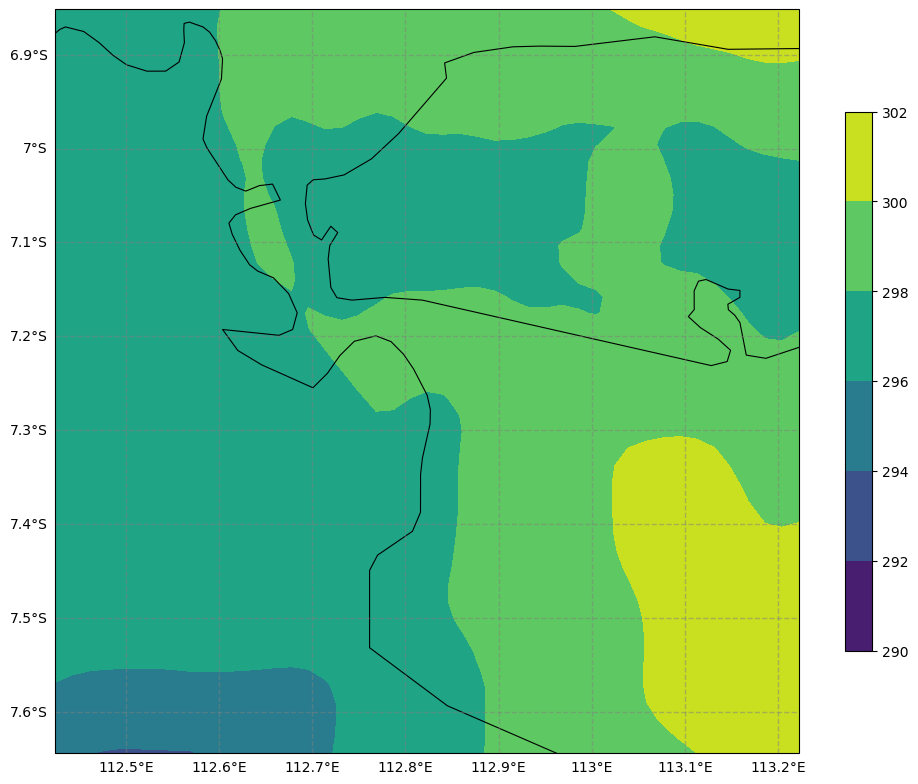

In [260]:
# Get the cartopy mapping object
cart_proj = wrf.get_cartopy(wrf_t2, timeidx=time_idx)

# Smooth the air temperature
smooth_t2 = wrf.smooth2d(wrf_t2, 3)

# Create a figure
fig = plt.figure(figsize=(12,10))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Add features to axes object 
ax.coastlines(linewidth=0.8, resolution='10m')

# Activate gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add features to the map like contour lines
# Set contour levels 
lvl = np.arange(290, 304, 2) # Non-inclusive of end value (1030)

# Add contour lines
# plt.contour(lons,
#             lats,
#             wrf_t2, 
#             levels=lvl,
#             colors='k',
#             transform=crs.PlateCarree())

# Add filled contour lines
plt.contourf(lons, lats, smooth_t2[time_idx, :, :],
            levels=lvl,
            transform=crs.PlateCarree(),
            cmap='viridis')

# Add colorbar
plt.colorbar(ax=ax, shrink=0.7)

# Manually set extent of map projection
# ax.set_extent([])

plt.show()

# Menghitung Curah Hujan Setiap Jam

In [111]:
# Get RAINC & RAINNC 
rainc  = wrf.getvar(wrf_d03, "RAINC", timeidx=wrf.ALL_TIMES)
rainnc = wrf.getvar(wrf_d03, "RAINNC", timeidx=wrf.ALL_TIMES)

# Get attribute
rain_attr = rainc.attrs

In [198]:
# Sum RAINC & RAINNC
rain = rainc + rainnc
rain_d = rain.copy()
# Substract for each time step with the previous time step
# 1, 2, 3, 4, 5, ..., 66
# 0, 1, 2, 3, 4, ..., 65
# _____________ -

for i in range(1, 67):
    rain_d[i, :, :] = rain[i, :, :] - rain[i-1, :, :]

# rain_d = rain[1:67, :, :] - rain[0:66, :, :]

# Assign attribute
rain_d.attrs = rain_attr

# Assign description attribute
rain_d.attrs["description"] = "Total precipitation"

In [199]:
rain_d.to_numpy().max()

105.93535

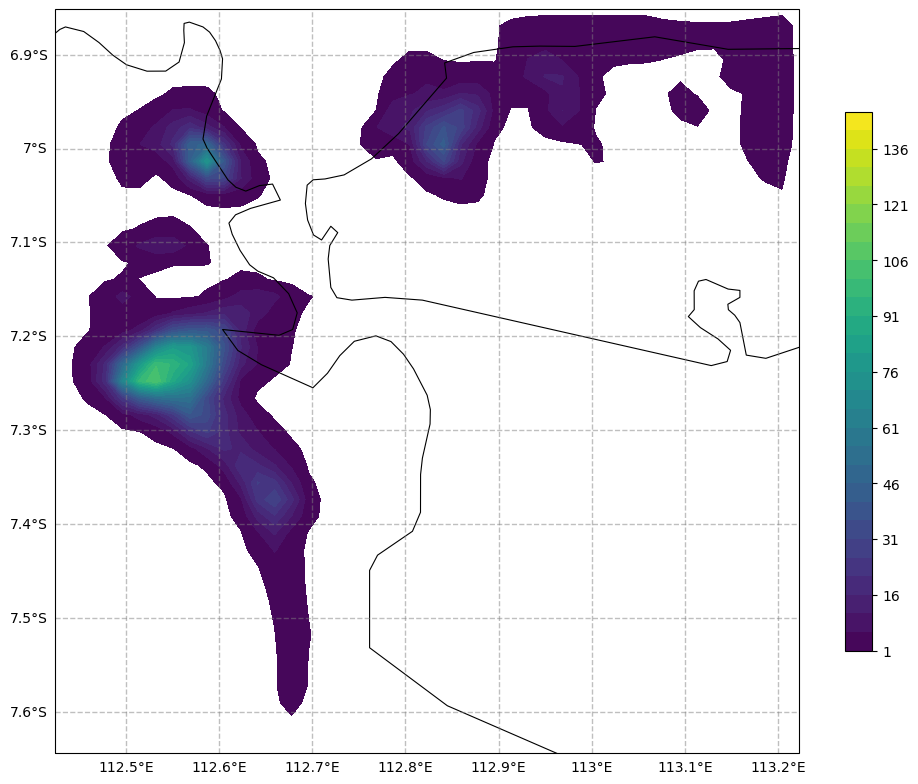

In [204]:
# Get the cartopy mapping object
cart_proj = wrf.get_cartopy(rain_d, timeidx=20)

# Smooth the air temperature
# smooth_rain = wrf.smooth2d(rain, 2)

# Create a figure
fig = plt.figure(figsize=(12,10))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Add features to axes object 
ax.coastlines(linewidth=0.8, resolution='10m')

# Activate gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add features to the map like contour lines
# Set contour levels 
lvl = np.arange(1, 150, 5) # Non-inclusive of end value (1030)

# Add contour lines
# plt.contour(lons,
#             lats,
#             wrf_t2, 
#             levels=lvl,
#             colors='k',
#             transform=crs.PlateCarree())

# Add filled contour lines
plt.contourf(lons, lats, rain_d[60, :, :],
            levels=lvl,
            transform=crs.PlateCarree(),
            cmap='viridis')

# Add colorbar
plt.colorbar(ax=ax, shrink=0.7)

# Manually set extent of map projection
# ax.set_extent([])

plt.show()